# HUMAN ACTIVITY RECOGNITION USING UCI DATA SET 
TASK IS TO PREDICT THE ACTIVITIES OF A PERSON BASED ON THE TIME SERIES DATA WHICH IS DIVIDED INTO ENGINEERED AND RAW DATA
 1)WILL USE RAW DATA TO PREDICT USING DEEP LEARNING
2) WILL MAKE USE OF ENGINEERED DATA TO BUILD MACHINE LEARNING MODELS TO PREDICT THE CLASS

THE PROBLEM IS A SIX CLASS CLASSIFICATION (STANDING , SITTING , WALKING , WALK_DOWNSTAIRS, WALK_UPSTAIRS , LAYING)

In [20]:
### import bunch of libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [21]:
# ### read data
# df = pd.read_table('features.txt', index_col = 0)
# print(len(df))
# df.head()

In [25]:
features = list()
with open('features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]

len(features)
        
    

561

In [30]:
### read train data 
X_train = pd.read_csv('X_train.txt',delim_whitespace=True, header=None, names=features)

## add subject to the train data
X_train['subject'] = pd.read_csv('subject_train.txt', header = None , squeeze = True)

y_train = pd.read_csv('y_train.txt' , names = ['activity'], squeeze = True)
y_train_class_labels = y_train.map({1:'walking' , 2: 'walking_upstairs' , 3: 'walking_downstairs',
                                   4:'sitting', 5:'standing', 6:'laying'})


/usr/local/lib/python3.7/site-packages/pandas/io/parsers.py:702: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


In [33]:
### lets put it together

train_data =X_train
train_data['activity'] = y_train
train_data['activity_name'] = y_train_class_labels
print(train_data.shape)
train_data.head()

(7352, 564)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,activity,activity_name
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,standing
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,standing
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,standing
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,standing
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,standing


In [35]:
### read test data
X_test = pd.read_csv('X_test.txt',delim_whitespace=True, header=None, names=features)

## add subject to the train data
X_test['subject'] = pd.read_csv('subject_test.txt', header = None , squeeze = True)

y_test = pd.read_csv('y_test.txt' , names = ['activity'], squeeze = True)
y_test_class_labels = y_test.map({1:'walking' , 2: 'walking_upstairs' , 3: 'walking_downstairs',
                                   4:'sitting', 5:'standing', 6:'laying'})



/usr/local/lib/python3.7/site-packages/pandas/io/parsers.py:702: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


In [36]:
### lets put it together

test_data =X_test
test_data['activity'] = y_test
test_data['activity_name'] = y_test_class_labels
print(test_data.shape)
test_data.head()

(2947, 564)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,activity,activity_name
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,standing
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,standing
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,standing
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,standing
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,standing


In [37]:
 ### check for any duplciates
    
print(sum(train_data.duplicated()))
print(sum(test_data.duplicated()))

0
0


In [42]:
### check for null/nan

print(train_data.isnull().values.sum())
print(test_data.isnull().values.sum())

0
0


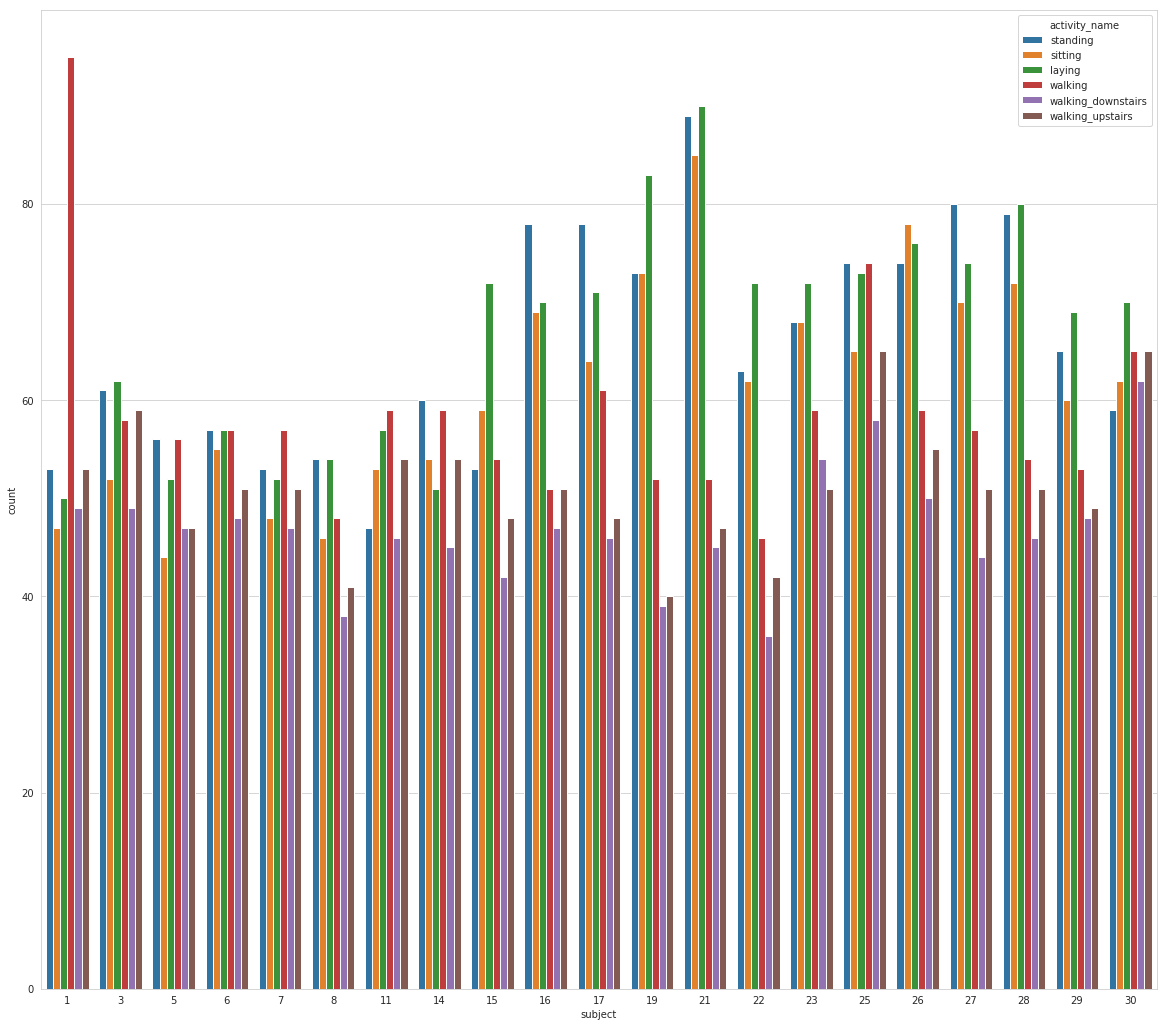

In [46]:
### class lables imbalance
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'
plt.figure(figsize = (20,18))
sns.countplot(x = 'subject', hue = 'activity_name' , data = train_data)
plt.show()

# from above plot we can see that there is no such skewness towards any class label

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

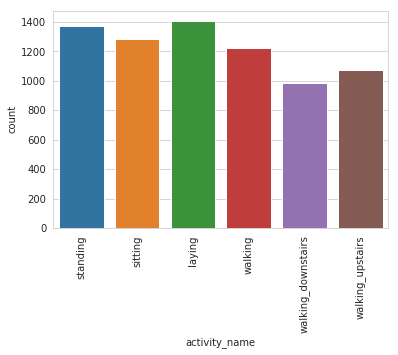

In [49]:
sns.countplot(train_data.activity_name)
plt.xticks(rotation = 90)

In [50]:
train_data.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'activity',
       'activity_name'],
      dtype='object', length=564)

In [54]:
### lets rempve special symbols like () , - from column names

columns = train_data.columns
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]','')
columns = columns.str.replace(',','')
train_data.columns = columns
test_data.columns = columns
test_data.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'activity', 'activity_name'],
      dtype='object', length=564)

In [55]:
## save preprocessd data to new file
train_data.to_csv('train_data.csv', index = False)
test_data.to_csv('test_data.csv', index = False)

In [56]:
### EDA

### apply Tsne to viaulize high dimensional data

from sklearn.manifold import TSNE

def tsne_plot(X_axis , y_axis, perpl, _iter=1000 , img_name_prefix = 'tsne'):
    for i , perplexity in enumerate(perpl):
        X_red = TSNE(verbose = 2,perplexity = perplexity).fit_transform(X_axis)
        
        df = pd.DataFrame({'x':X_red[:,0] , 'y':X_red[:,1] , 'label': y_axis})
        sns.lmplot(data = df, x = 'x' , y  = 'y' , hue = 'label', fit_reg=False, size = 8,\
                  palette='Set1' , markers=['^','v','s','o', '1','2'])
        plt.show()
        

[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.178s...
[t-SNE] Computed neighbors for 7352 samples in 30.926s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.635855
[t-SNE] Computed conditional probabilities in 0.037s
[t-SNE] Iteration 50: error = 124.7024765, gradient norm = 0.0282986 (50 iterations in 4.105s)
[t-SNE] Iteration 100: error = 106.9340820, gradient norm = 0.0301412 (50 iterations in 3.101s)
[t-SNE] Iteration 150: error = 100.6825256, gradient norm 

/usr/local/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


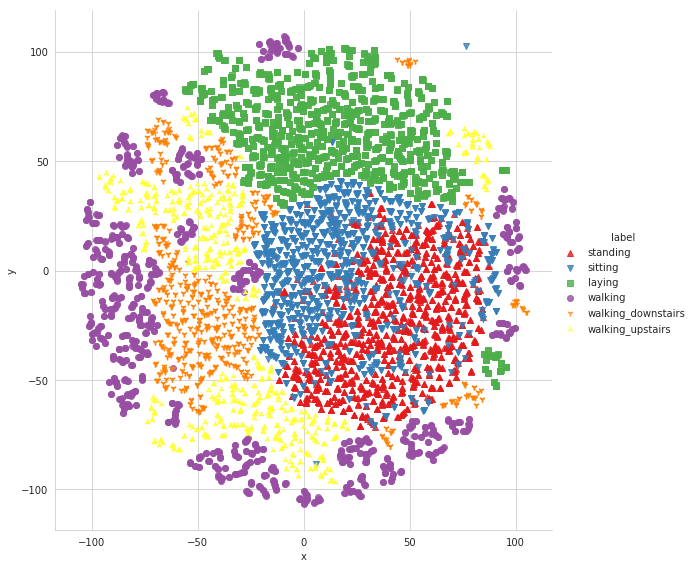

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.175s...
[t-SNE] Computed neighbors for 7352 samples in 31.205s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961265
[t-SNE] Computed conditional probabilities in 0.038s
[t-SNE] Iteration 50: error = 113.9736404, gradient norm = 0.0241552 (50 iterations in 4.691s)
[t-SNE] Iteration 100: error = 97.7362747, gradient norm = 0.0163772 (50 iterations in 2.970s)
[t-SNE] Iteration 150: error = 93.0978928, gradient norm =

/usr/local/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


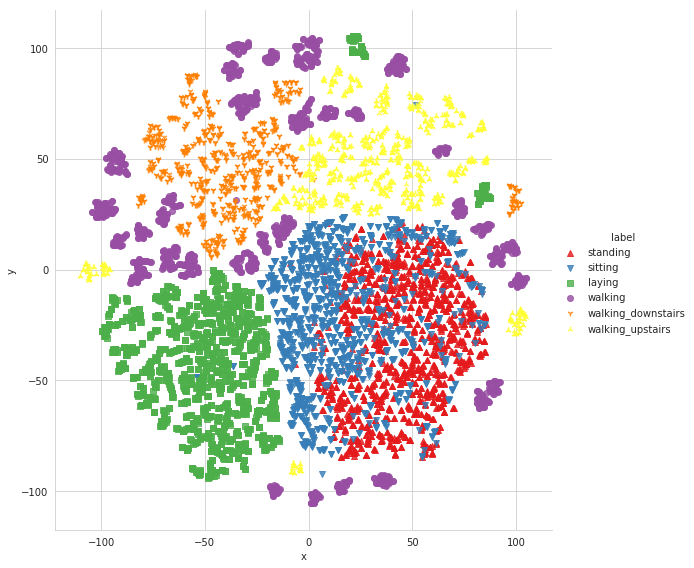

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.172s...
[t-SNE] Computed neighbors for 7352 samples in 32.731s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133828
[t-SNE] Computed conditional probabilities in 0.070s
[t-SNE] Iteration 50: error = 105.6074219, gradient norm = 0.0214004 (50 iterations in 4.161s)
[t-SNE] Iteration 100: error = 90.0907822, gradient norm = 0.0096831 (50 iterations in 2.870s)
[t-SNE] Iteration 150: error = 87.1794662, gradient norm =

/usr/local/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


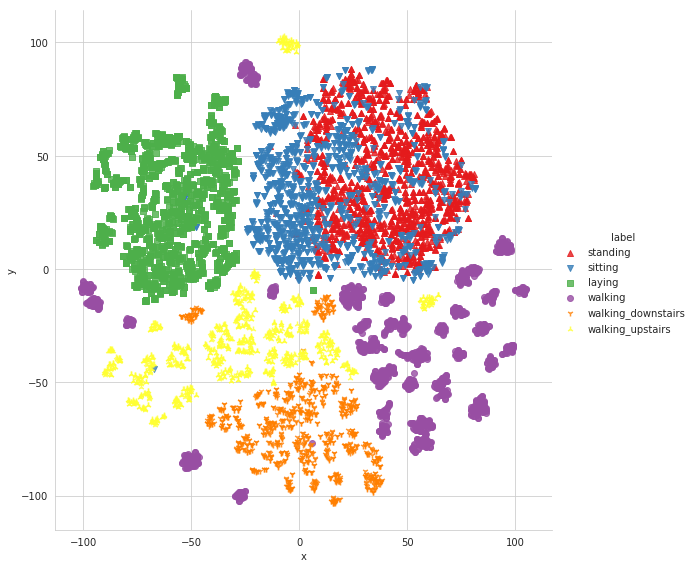

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.147s...
[t-SNE] Computed neighbors for 7352 samples in 31.282s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274335
[t-SNE] Computed conditional probabilities in 0.129s
[t-SNE] Iteration 50: error = 97.3304443, gradient norm = 0.0212250 (50 iterations in 3.672s)
[t-SNE] Iteration 100: error = 84.1881409, gradient norm = 0.0078534 (50 iterations in 2.749s)
[t-SNE] Iteration 150: error = 81.9456635, gradient norm = 

/usr/local/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


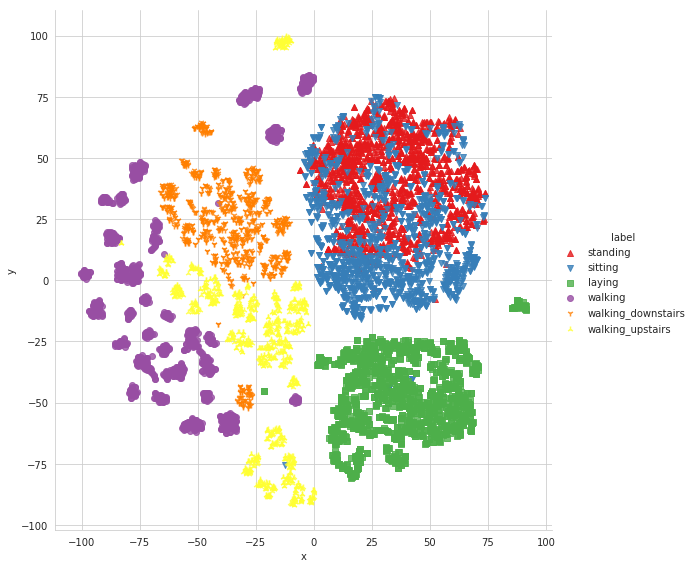

In [60]:
X_pre_tsne = train_data.drop(['subject', 'activity', 'activity_name'], axis =1)
y_pre_tsne = train_data['activity_name']
tsne_plot(X_axis=X_pre_tsne , y_axis= y_pre_tsne, perpl = [2,5,10,20])

# FROM TSNE PLOTS WE CAN CLEARLY SAY THAT EXCEPT SITTING AND STANDING CLASES ALL OTHER CLASSES ARE PERFECLTY SEPERATED
### SO THE MODEL WE BUILT SHOULD BE SIMPLE AND LINER MODELS , WHICH GIVES US BETTER ACCURACY AND PREDICTIONS

In [91]:
### read train and test preprocssed data to model

train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')


In [92]:
 
X_train = train.drop(['subject','activity','activity_name'], axis = 1)
y_train = train.activity_name

X_test= test_data.drop(['subject','activity','activity_name'], axis = 1)
y_test = test.activity_name
    

In [93]:
### Build simple classification models 
labels = ['laying' , 'sitting' , 'standing','walking', 'walking_donwstairs' , 'walking_upstairs']


In [94]:
import itertools
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
plt.rcParams["font.family"]= 'Dejavu Sans'

### lets define a fucntion which calcuates confusoj matrix and plots it

def confusion_matrix_plot(cm, classes , normalize = False ,cmap = plt.cm.Blues):
    if normalize:
        cm = cm.astype('float')/ cm.sum(axis = 1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest' , cmap = cmap)
    plt.colorbar()
    plt.xticks(rotation=90)
    if normalize:
        fmt = '.2f'
    else:
        fmt = 'd'
    threshold = cm.max()/2
    for i , j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, format(cm[i,j], fmt),
                horizontalalignment = 'center',
                color = 'white' if cm[i ,j ] > threshold else 'black')
    plt.tight_layout()
    
    


In [108]:

### function to evaluate model performance 
def model_performaces(model, X_train,X_test , y_test ,y_train, class_labels , cm_normalize = True ,
                     print_cm = True , cm_map = plt.cm.Greens):
    results = dict()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results['predicted'] = y_pred
    
    accuracy = accuracy_score(y_test , y_pred)
    results['accuracy'] = accuracy
    
    cm = confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    confusion_matrix_plot(cm, classes=class_labels,normalize=True,cmap =plt.cm.Blues )
    plt.show()
    class_report = classification_report(y_test, y_pred)
    results['class_report'] = class_report
    results['model'] = model
    return results


In [96]:
### GRID SEARCH 

def grid_search(model):
    print(model.best_params_ , '\n')
    print(model.best_estimator_,'\n')
    print(model.best_score_)
    

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  1.6min finished
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


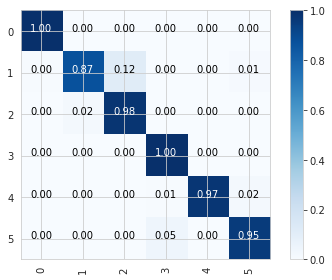

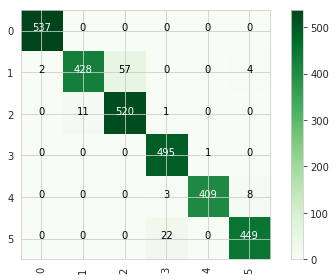

In [109]:
### Logistic Regression using grid search 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
params = {'C':[0.01, 0.1,1,10,20,30], 'penalty':['l2','l1']}
logistic_regression = LogisticRegression()
logistic_regression_grid_search = GridSearchCV(logistic_regression, param_grid=params,cv = 3,verbose = 1,n_jobs = -1)
logistic_regression_grid_search_results = model_performaces(logistic_regression_grid_search,X_train, X_test,
                                                           y_test , y_train,class_labels= labels)
confusion_matrix_plot(logistic_regression_grid_search_results['confusion_matrix'], classes= labels, cmap =plt.cm.Greens)
plt.show()


In [104]:
grid_search(logistic_regression_grid_search_results['model'])


{'C': 30, 'penalty': 'l2'} 

LogisticRegression(C=30, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False) 

0.9461371055495104


Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   41.7s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  6.5min finished


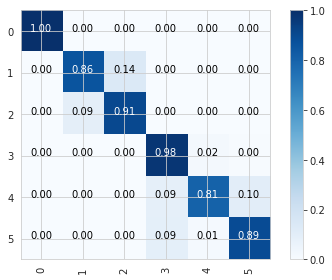

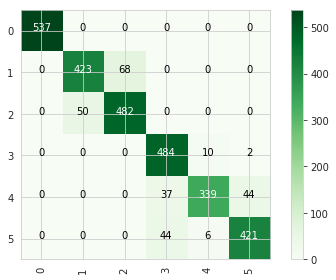

In [111]:
### Random forest model

from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators':np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
RF = RandomForestClassifier()
RF_grid = GridSearchCV(RF,param_grid = params, cv =3,verbose = 1, n_jobs = -1)
RF_results = model_performaces(RF_grid , X_train, X_test,y_test , y_train, class_labels = labels)
confusion_matrix_plot(RF_results['confusion_matrix'], classes= labels, cmap =plt.cm.Greens)
plt.show()


In [112]:
grid_search(RF_results['model'])


{'max_depth': 7, 'n_estimators': 170} 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=170, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 

0.9162132752992383


# THE LINEAR MODELS ARE GIVING VERY GOOD ACCURACY COMPARED TO ENSEMBLE MODELS
reason would be calss lables sitting and standing are not seperated(grouped together)


In [203]:
### USING RAW TIME SERIES DATA BY BREAKING INTO WINDOWS , WE PREDICT USING DEEP LEARNING MODELS
#### AS DEEP LEARNING COMES WITH INBUILT FEATURE ENGINNERING FUNCTIOANLITY

Activities = {0:'walking', 1:'walking_upstairs',2:'wlaking_donwstairs',3:'sitting',4:'standing',5:'laying'}

In [202]:
def confusion_matrix(y_true, y_predicted):
    y_true = pd.series([Activities[y] for y in np.argmax(y_true, axis=1)])
    y_pred = pd.series([Activities[y] for y in np.argmax(y_pred, axis=1)])
    
    return pd.crosstab(y_true, y_pred , rownames = ['True'], colnames = ['Pred'])
    


In [204]:
signals = ["body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"]


In [185]:
### simple fucntions to read data
def read_csv(filename):
    return pd.read_csv(filename,delim_whitespace = True, header = None)

def load_signals(subset):
    signals_data = []
    for signal in signals:
        filename  = f'Inertial Signals/{signal}_{subset}.txt'
        signals_data.append(read_csv(filename).as_matrix())
    return np.transpose(signals_data,(1,2,0)) 


In [186]:
def load_y(subset):
    filename = f'y_{subset}.txt'
    y =  read_csv(filename)[0]
    
    return pd.get_dummies(y).as_matrix()


In [187]:
def load_data():
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train') , load_y('test')
    
    return X_train, X_test, y_train, y_test


In [142]:
#!pip install --ignore-installed --upgrade tensorflow==1.9
!pip install --user tensorflow==1.9



In [141]:
### import tenserflow
np.random.seed(42)
import tensorflow as tf
tf.set_random_seed(42)

/usr/local/Cellar/python/3.7.2_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/usr/local/Cellar/python/3.7.2_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [143]:
### configure session
session_configuration = tf.ConfigProto(intra_op_parallelism_threads=1,inter_op_parallelism_threads=1)


In [146]:
###import keras
from keras import backend as K
sess = tf.Session(graph = tf.get_default_graph(), config = session_configuration)
K.set_session(sess)

In [147]:
### import keras libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout

In [197]:
### initialize epochs , no of hidden layers , batch_size
epochs = 30
batch_size = 16
n_hidden = 32

In [188]:
### load data
X_train, X_test , y_train, y_test = load_data()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [190]:
def count_classes(y):
    return len(set([tuple(category) for category in y]))

In [195]:
timesteps = len(X_train[0])
input_dimesnions = len(X_train[0][0])
num_classes = count_classes(y_train)




In [199]:
### initialize sequential model
model = Sequential()

## config params
model.add(LSTM(n_hidden , input_shape=(timesteps, input_dimesnions)))

## adding dropout layer

model.add(Dropout(0.5))

## adding dense layers and sigmoid activation
model.add(Dense(num_classes, activation = 'sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 32)                5376      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 198       
Total params: 5,574
Trainable params: 5,574
Non-trainable params: 0
_________________________________________________________________


In [200]:
### compile model
model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

In [201]:
### train the model
model.fit(X_train, y_train, batch_size = batch_size,validation_data=(X_test, y_test), epochs = epochs)

Instructions for updating:
Use tf.cast instead.
Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 39s 5ms/step - loss: 1.3368 - acc: 0.4404 - val_loss: 1.2337 - val_acc: 0.4337
Epoch 2/30
7352/7352 [==============================] - 36s 5ms/step - loss: 1.1077 - acc: 0.4993 - val_loss: 1.2770 - val_acc: 0.4289
Epoch 3/30
7352/7352 [==============================] - 35s 5ms/step - loss: 1.0580 - acc: 0.5150 - val_loss: 1.0205 - val_acc: 0.5283
Epoch 4/30
7352/7352 [==============================] - 34s 5ms/step - loss: 0.8910 - acc: 0.6075 - val_loss: 0.8446 - val_acc: 0.6227
Epoch 5/30
7352/7352 [==============================] - 34s 5ms/step - loss: 0.7414 - acc: 0.6646 - val_loss: 0.7507 - val_acc: 0.6376
Epoch 6/30
7352/7352 [==============================] - 35s 5ms/step - loss: 0.7302 - acc: 0.6854 - val_loss: 0.7523 - val_acc: 0.7336
Epoch 7/30
7352/7352 [==============================] - 32s 4ms/step - loss: 0.6104 - acc: 0.7

In [ ]:
### confusion matrix
confusion_matrix(y_test, model.predict(X_test))


In [ ]:
model_score= model.evaluate(X_test, y_test)
model_score


# WITH SIMPLE 2 LAYER ARCHITECTURE WE GOT 90% ACC , BY DOING HYPERPARAMETER TUNING WE CAN IMROVE THE ACCURACY